In [5]:
# Import necessary libraries
import os
import pandas as pd
import configparser

In [6]:
# Get AWS credentials
aws_cred_filepath = os.path.join(os.path.expanduser("~"), '.aws', 'credentials')
aws_credentials = configparser.ConfigParser()
aws_credentials.read(aws_cred_filepath)
aws_access_key_id = aws_credentials.get('default', 'aws_access_key_id')
aws_secret_access_key = aws_credentials.get('default', 'aws_secret_access_key')

# KDD12

In [23]:
# Read in kdd training from S3
training_data = pd.read_csv(
    's3://mlds-final-project-bucket/kdd12/train/training/training.txt',
    delimiter='\t',
    storage_options={
        'key': aws_access_key_id,
        'secret': aws_secret_access_key
    },
    nrows = 1000,
    header=None,
    names=['Click','Impression','DisplayURL','AdID','AdvertiserID','Depth','Position','QueryID','KeywordID','TitleID','DescriptionID','UserID']
    )

In [24]:
training_data.head()

,Click,Impression,DisplayURL,AdID,AdvertiserID,Depth,Position,QueryID,KeywordID,TitleID,DescriptionID,UserID
0,0,1,4298118681424644510,7686695,385,3,3,1601,5521,7709,576,490234
1,0,1,4860571499428580850,21560664,37484,2,2,2255103,317,48989,44771,490234
2,0,1,9704320783495875564,21748480,36759,3,3,4532751,60721,685038,29681,490234
3,0,1,13677630321509009335,3517124,23778,3,1,1601,2155,1207,1422,490234
4,0,1,3284760244799604489,20758093,34535,1,1,4532751,77819,266618,222223,490234


In [25]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Click          1000 non-null   int64 
 1   Impression     1000 non-null   int64 
 2   DisplayURL     1000 non-null   uint64
 3   AdID           1000 non-null   int64 
 4   AdvertiserID   1000 non-null   int64 
 5   Depth          1000 non-null   int64 
 6   Position       1000 non-null   int64 
 7   QueryID        1000 non-null   int64 
 8   KeywordID      1000 non-null   int64 
 9   TitleID        1000 non-null   int64 
 10  DescriptionID  1000 non-null   int64 
 11  UserID         1000 non-null   int64 
dtypes: int64(11), uint64(1)
memory usage: 93.9 KB


In [29]:
# Read in kdd test from S3
test_data = pd.read_csv(
    's3://mlds-final-project-bucket/kdd12/test/test.txt',
    delimiter='\t',
    storage_options={
        'key': aws_access_key_id,
        'secret': aws_secret_access_key
    },
    nrows = 1000,
    header=None,
    names=['DisplayURL','AdID','AdvertiserID','Depth','Position','QueryID','KeywordID','TitleID','DescriptionID','UserID']
    )

In [30]:
test_data.head()

,DisplayURL,AdID,AdvertiserID,Depth,Position,QueryID,KeywordID,TitleID,DescriptionID,UserID
0,5325279403472852193,22166806,38756,3,3,6415,34,3341,2080,490234
1,14340390157469404125,3111380,23777,3,1,6415,8872,62423,56167,490234
2,16772851793638846604,22111129,38584,3,2,6415,8872,454986,378040,490234
3,5325279403472852193,22166807,38756,2,1,83,34,5360,2080,490234
4,12057878999086460853,20180629,27961,2,2,83,34,328,455,490234


In [31]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DisplayURL     1000 non-null   uint64
 1   AdID           1000 non-null   int64 
 2   AdvertiserID   1000 non-null   int64 
 3   Depth          1000 non-null   int64 
 4   Position       1000 non-null   int64 
 5   QueryID        1000 non-null   int64 
 6   KeywordID      1000 non-null   int64 
 7   TitleID        1000 non-null   int64 
 8   DescriptionID  1000 non-null   int64 
 9   UserID         1000 non-null   int64 
dtypes: int64(9), uint64(1)
memory usage: 78.3 KB


# Avazu

In [32]:
# Read in avazu training data from S3
avazu_training_data = pd.read_csv(
    's3://mlds-final-project-bucket/avazu/train/train.csv',
    storage_options={
        'key': aws_access_key_id,
        'secret': aws_secret_access_key
    },
    nrows = 1000
    )
avazu_training_data.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1000009418151094273,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,10000169349117863715,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,10000371904215119486,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,10000640724480838376,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,10000679056417042096,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157


In [33]:
avazu_training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1000 non-null   uint64
 1   click             1000 non-null   int64 
 2   hour              1000 non-null   int64 
 3   C1                1000 non-null   int64 
 4   banner_pos        1000 non-null   int64 
 5   site_id           1000 non-null   object
 6   site_domain       1000 non-null   object
 7   site_category     1000 non-null   object
 8   app_id            1000 non-null   object
 9   app_domain        1000 non-null   object
 10  app_category      1000 non-null   object
 11  device_id         1000 non-null   object
 12  device_ip         1000 non-null   object
 13  device_model      1000 non-null   object
 14  device_type       1000 non-null   int64 
 15  device_conn_type  1000 non-null   int64 
 16  C14               1000 non-null   int64 
 17  C15            

In [34]:
# Read in avazu test data from S3
avazu_test_data = pd.read_csv(
    's3://mlds-final-project-bucket/avazu/test/test.csv',
    storage_options={
        'key': aws_access_key_id,
        'secret': aws_secret_access_key
    },
    nrows = 1000
    )
avazu_test_data.head()

,id,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10000174058809263569,14103100,1005,0,235ba823,f6ebf28e,f028772b,ecad2386,7801e8d9,07d7df22,...,1,0,8330,320,50,761,3,175,100075,23
1,10000182526920855428,14103100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,22676,320,50,2616,0,35,100083,51
2,10000554139829213984,14103100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,22676,320,50,2616,0,35,100083,51
3,10001094637809798845,14103100,1005,0,85f751fd,c4e18dd6,50e219e0,51cedd4e,aefc06bd,0f2161f8,...,1,0,18648,320,50,1092,3,809,100156,61
4,10001377041558670745,14103100,1005,0,85f751fd,c4e18dd6,50e219e0,9c13b419,2347f47a,f95efa07,...,1,0,23160,320,50,2667,0,47,-1,221


In [35]:
avazu_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1000 non-null   uint64
 1   hour              1000 non-null   int64 
 2   C1                1000 non-null   int64 
 3   banner_pos        1000 non-null   int64 
 4   site_id           1000 non-null   object
 5   site_domain       1000 non-null   object
 6   site_category     1000 non-null   object
 7   app_id            1000 non-null   object
 8   app_domain        1000 non-null   object
 9   app_category      1000 non-null   object
 10  device_id         1000 non-null   object
 11  device_ip         1000 non-null   object
 12  device_model      1000 non-null   object
 13  device_type       1000 non-null   int64 
 14  device_conn_type  1000 non-null   int64 
 15  C14               1000 non-null   int64 
 16  C15               1000 non-null   int64 
 17  C16            

# Criteo

In [40]:
# Create column name list as per the README file
criteo_names = ['click']
for i in range(1, 14):
    criteo_names.append('int_{0}'.format(i))

for i in range(1, 27):
    criteo_names.append('cat_{0}'.format(i))

In [41]:
# Read in criteo training data from S3
criteo_training_data = pd.read_csv(
    's3://mlds-final-project-bucket/dac/train/train.txt',
    storage_options={
        'key': aws_access_key_id,
        'secret': aws_secret_access_key
    },
    nrows = 1000,
    sep='\t',
    header=None,
    names=criteo_names
    )
criteo_training_data.head()

,click,int_1,int_2,int_3,int_4,int_5,int_6,int_7,int_8,int_9,...,cat_17,cat_18,cat_19,cat_20,cat_21,cat_22,cat_23,cat_24,cat_25,cat_26
0,0,1.0,1,5.0,0.0,1382.0,4.0,15.0,2,181.0,...,e5ba7672,f54016b9,21ddcdc9,b1252a9d,07b5194c,NaN,3a171ecb,c5c50484,e8b83407,9727dd16
1,0,2.0,0,44.0,1.0,102.0,8.0,2.0,2,4.0,...,07c540c4,b04e4670,21ddcdc9,5840adea,60f6221e,NaN,3a171ecb,43f13e8b,e8b83407,731c3655
2,0,2.0,0,1.0,14.0,767.0,89.0,4.0,2,245.0,...,8efede7f,3412118d,NaN,NaN,e587c466,ad3062eb,3a171ecb,3b183c5c,NaN,NaN
3,0,NaN,893,NaN,NaN,4392.0,NaN,0.0,0,0.0,...,1e88c74f,74ef3502,NaN,NaN,6b3a5ca6,NaN,3a171ecb,9117a34a,NaN,NaN
4,0,3.0,-1,NaN,0.0,2.0,0.0,3.0,0,0.0,...,1e88c74f,26b3c7a7,NaN,NaN,21c9516a,NaN,32c7478e,b34f3128,NaN,NaN


In [42]:
criteo_training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   click   1000 non-null   int64  
 1   int_1   542 non-null    float64
 2   int_2   1000 non-null   int64  
 3   int_3   770 non-null    float64
 4   int_4   787 non-null    float64
 5   int_5   959 non-null    float64
 6   int_6   752 non-null    float64
 7   int_7   961 non-null    float64
 8   int_8   1000 non-null   int64  
 9   int_9   961 non-null    float64
 10  int_10  542 non-null    float64
 11  int_11  961 non-null    float64
 12  int_12  225 non-null    float64
 13  int_13  787 non-null    float64
 14  cat_1   1000 non-null   object 
 15  cat_2   1000 non-null   object 
 16  cat_3   967 non-null    object 
 17  cat_4   967 non-null    object 
 18  cat_5   1000 non-null   object 
 19  cat_6   878 non-null    object 
 20  cat_7   1000 non-null   object 
 21  cat_8   1000 non-null   object 
 22  c

<Axes: >

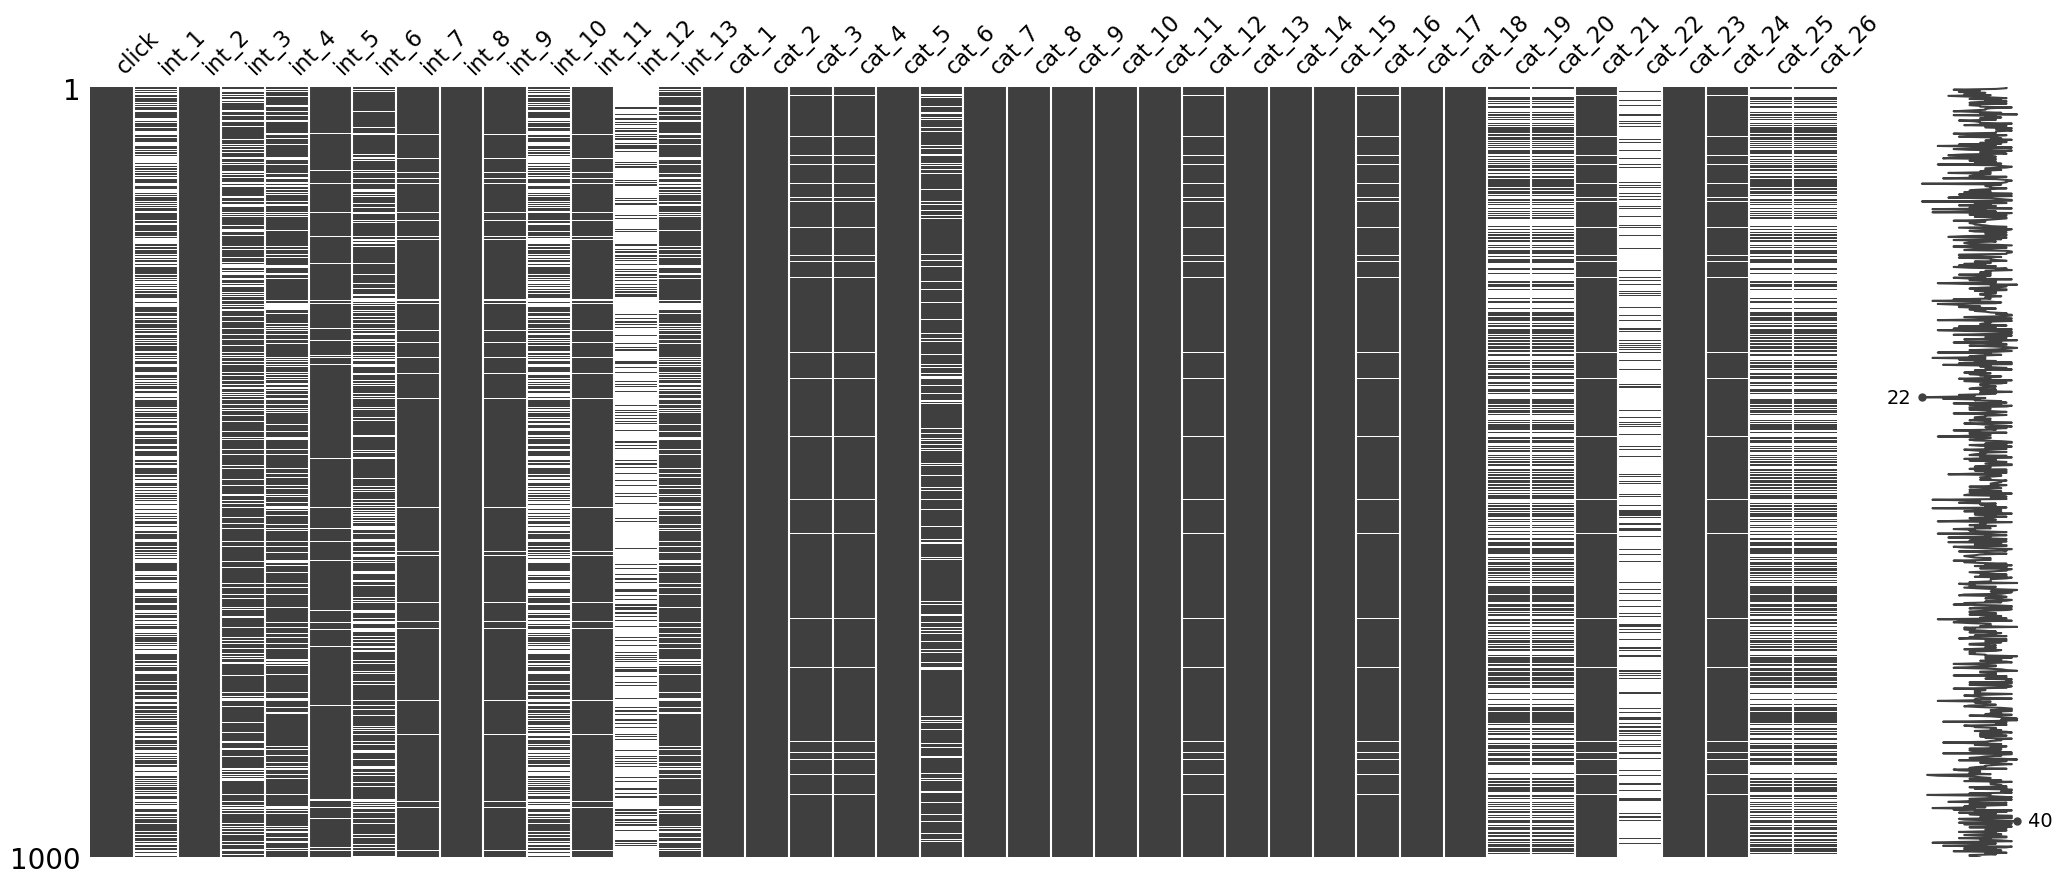

In [43]:
import missingno as msno

# Visualize missing values as matrix
msno.matrix(criteo_training_data)

In [44]:
# Read in criteo test data from S3
criteo_test_data = pd.read_csv(
    's3://mlds-final-project-bucket/dac/test/test.txt',
    storage_options={
        'key': aws_access_key_id,
        'secret': aws_secret_access_key
    },
    nrows = 1000,
    sep='\t',
    header=None,
    names=criteo_names[1:]
    )
criteo_test_data.head()

,int_1,int_2,int_3,int_4,int_5,int_6,int_7,int_8,int_9,int_10,...,cat_17,cat_18,cat_19,cat_20,cat_21,cat_22,cat_23,cat_24,cat_25,cat_26
0,NaN,29,50.0,5.0,7260.0,437.0,1.0,4.0,14.0,NaN,...,3486227d,1616f155,21ddcdc9,5840adea,2c277e62,NaN,423fab69,54c91918,9b3e8820,e75c9ae9
1,27.0,17,45.0,28.0,2.0,28.0,27.0,29.0,28.0,1.0,...,e5ba7672,b4abdd09,21ddcdc9,5840adea,36a7ab86,NaN,32c7478e,85e4d73f,010f6491,ee63dd9b
2,1.0,1,19.0,7.0,1.0,3.0,1.0,7.0,7.0,1.0,...,d4bb7bd8,bd17c3da,1d04f4a4,a458ea53,82bdc0bb,NaN,32c7478e,5bdcd9c4,010f6491,cca57dcc
3,4.0,1,NaN,6.0,1051.0,134.0,4.0,35.0,72.0,1.0,...,07c540c4,bdc06043,NaN,NaN,6dfd157c,ad3062eb,423fab69,ef089725,NaN,NaN
4,7.0,1,25.0,10.0,139.0,74.0,48.0,13.0,44.0,1.0,...,27c07bd6,395856b0,21ddcdc9,a458ea53,9c3eb598,ad3062eb,3a171ecb,c0b8dfd6,001f3601,7a2fb9af


In [45]:
criteo_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   int_1   574 non-null    float64
 1   int_2   1000 non-null   int64  
 2   int_3   751 non-null    float64
 3   int_4   768 non-null    float64
 4   int_5   966 non-null    float64
 5   int_6   774 non-null    float64
 6   int_7   962 non-null    float64
 7   int_8   999 non-null    float64
 8   int_9   962 non-null    float64
 9   int_10  574 non-null    float64
 10  int_11  962 non-null    float64
 11  int_12  277 non-null    float64
 12  int_13  768 non-null    float64
 13  cat_1   1000 non-null   object 
 14  cat_2   1000 non-null   object 
 15  cat_3   973 non-null    object 
 16  cat_4   973 non-null    object 
 17  cat_5   1000 non-null   object 
 18  cat_6   894 non-null    object 
 19  cat_7   1000 non-null   object 
 20  cat_8   1000 non-null   object 
 21  cat_9   1000 non-null   object 
 22  c

<Axes: >

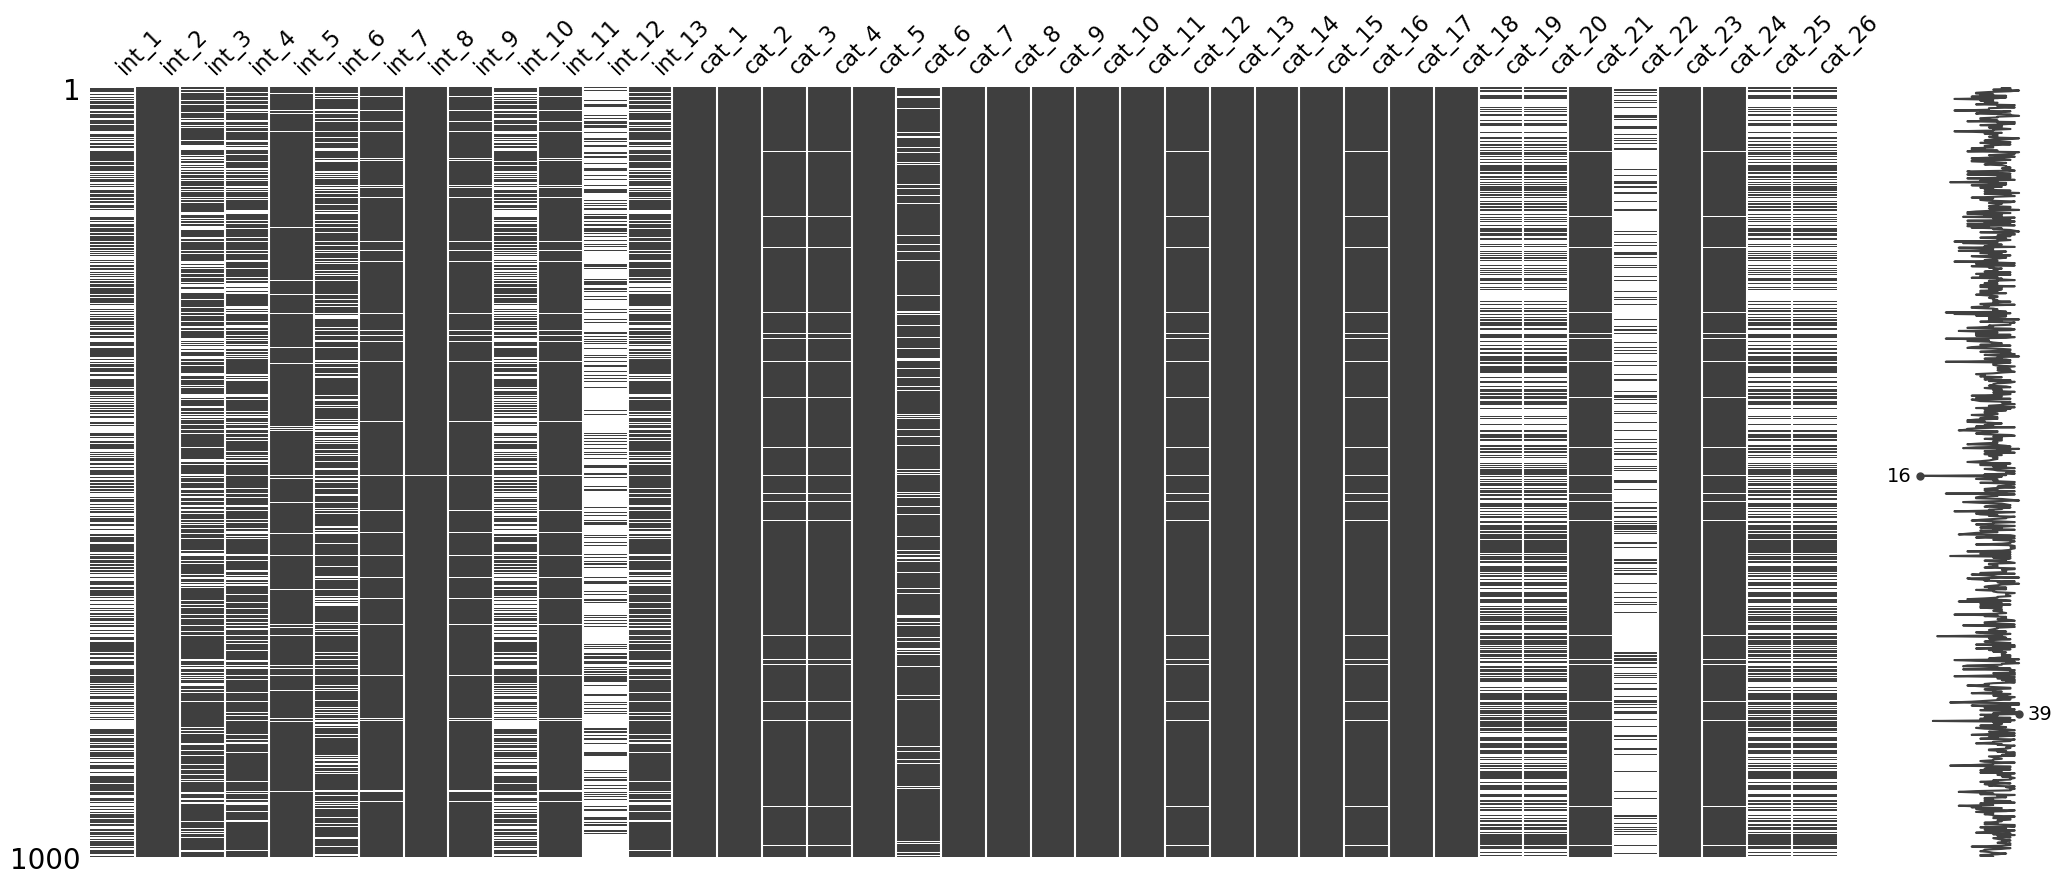

In [46]:
# visualize missing values as matrix
msno.matrix(criteo_test_data)